# Part 1 Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories 

In [4]:
library(plotly)

Warning message:
"package 'plotly' was built under R version 3.5.2"Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



Plotly is an open source graphing library in R. It is used to make interactive, publication-quality graphs online.

In [72]:
data <- read.csv('Positive tests.csv')

There are many variables to plot. We use Plotly to plot the graph and trace all the variables. The data is obtained from the CDC website

In [74]:
NationalSummary <- data
xaxis <- c(NationalSummary$Week)
y1 <- NationalSummary$Total.A
y2 <- NationalSummary$Total.B
perPositive <- NationalSummary$Percent.Positive
data <- data.frame(xaxis,y1,y2)
p <- plot_ly(data, x = c(xaxis)) %>%
    add_trace(y = ~y1, type = 'bar', name = 'A',marker = list(color = 'yellow')) %>%
    add_trace(y = ~y2, type = 'bar',name = 'B',marker = list(color = 'green')) %>%
    add_trace(y = ~perPositive, type = 'scatter', mode = 'lines', name = 'Percent Positive',yaxis = 'y2',
              line = list(color='black')) %>%
    add_trace(y = ~c(NationalSummary$Percent.Positive.A), type = 'scatter', mode = 'lines', name = 'Percent Positive',
              yaxis = 'y2',line = list(color='yellow', dash = 'dot')) %>%
    add_trace(y = ~c(NationalSummary$Percent.Positive.B), type = 'scatter', mode = 'lines', name = 'Percent Positive',
              yaxis = 'y2',line = list(color='green', dash = 'dot')) %>%
  layout(xaxis = list(type = 'category',title = "Week"),yaxis = list(range = c(0,18000),title = 'Number of positive specimens'),
         yaxis2 = list(range = c(0,30),overlaying = 'y',side = 'right', title = "Percent Positive"), 
         barmode = 'overlay', title='Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n
                    National Summary, 2018-2019 Season')

In [ ]:
p

# Part 2 PUBLIC HEALTH LABORATORIES

In [9]:
PositiveTested <- read.csv(file="Data CSV.csv", header=TRUE, sep=",")

In [15]:
library(plotly)
xaxis <- c(PositiveTested$Week)

Asubtype <- PositiveTested$A.Subtyping.not.performed.
Ah3n2 <- PositiveTested$A.H3N2v.
Ah1n1 <- PositiveTested$A.H1N1
Ah3 <- PositiveTested$A.H3.
B <- PositiveTested$B
Bvic <- PositiveTested$BVIC
Byam <- PositiveTested$BYAM

data <- data.frame(xaxis,Asubtype,Ah3n2,Ah1n1,Ah3,B,Bvic,Byam)

p <- plot_ly(data,x = c(xaxis)) %>%
    add_trace(y = ~Byam, type = 'bar', name = 'B(Yamagata Lineage)',marker = list(color = c('rgba(24,179,20,89)'))) %>%
    add_trace(y = ~Bvic, type = 'bar', name = 'B(Victoria Lineage)',marker = list(color = c('rgba(59,229,54,67)'))) %>%
    add_trace(y = ~B, type = 'bar', name = 'B(Lineage Not Performed)',marker = list(color = c('rgba(17,86,15,100)'))) %>%
    add_trace(y = ~Ah3n2, type = 'bar', name = 'H3N2v',marker = list(color = c('rgba(20,101,179,89)'))) %>%
    add_trace(y = ~Ah3, type = 'bar', name = 'A(H3N2)',marker = list(color = 'red')) %>%
    add_trace(y = ~Ah1n1, type = 'bar', name = 'A (H1N1)pdm09',marker = list(color = 'orange')) %>%
    add_trace(y = ~Asubtype, type = 'bar', name = 'A(Subtyping not performed)',marker = list(color = 'yellow')) %>%
    
    layout(xaxis = list(type = 'category',title='Week'), 
           yaxis=list(range = c(0,4000), title='Number of positive specimens'),
           barmode = 'stack', title = 'Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories\n 
National Summary, 2018-2019 Season')


In [ ]:
p

# Part 3 Influenza Associated Pediatric Deaths

In [207]:
data <- read.csv("Weekly.csv",skip=1,header=T)
data <- data[1:170,]
t <- list(
  family = "sans serif",
  size = 12,
  color = 'black')
marker_style <- list(line = list(width = 0.01,
                                 color = 'rgb(0, 0, 0)'));
p <- plot_ly(x=data$WEEK.NUMBER,y=data$PREVIOUS.WEEK.DEATHS,type="bar",color=I("dark green"),name="Deaths Reported Previous Week",marker=marker_style) %>%
  add_trace(y = data$CURRENT.WEEK.DEATHS, color=I("sky blue"),name = 'Deaths Reported Current Week',color=I("orange"),marker=marker_style) %>%
  layout(font=t,title="Number of Influenza Associated Pediatric Deaths\n by Week of Death: 2015-2016 season to present",xaxis=list(title="Week",tickangle=-90)
         ,yaxis = list(title = 'Number of Deaths',range=c(0,30)), barmode = 'stack') %>%
layout(legend = list(x = 0.4, y = -0.5))


In [ ]:
p

# Part 4 Mortality

In [205]:
Mort <- read.csv("mort.csv")

In [ ]:
library(plotly)
Mort$NewCol <- paste(Mort$Year, Mort$Week, sep='')
d<-data.frame(Mort$Week,Mort$Threshold,Mort$Expected,Mort$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza)
final<-plot_ly(d, x = ~Mort$NewCol) %>%
add_trace(y = ~c(Mort$Threshold),type = 'scatter', mode = 'lines', name = 'Threshold', 
          line = list(color='black',width =4)) %>%
add_trace(y = ~c(Mort$Expected), type = 'scatter', mode = 'lines', name = 'Base Line',
          line = list(color='black')) %>%
add_trace(y = ~c(Mort$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza), type = 'scatter', 
          mode = 'lines', name = 'Percent P&I',line = list(color='red')) %>%
layout(xaxis = list(title = "Week", type = "category",categoryarray=c(0,432)), 
       #xaxis2 = list(range = c(0,432), overlaying = 'x',side = 'top', type = "category"),
       yaxis = list(range = c(4,12),title = '% of All Deaths due to P&I'),
       title='Pneumonia and Influenza Mortality from\nthe National Center for Health Statics Mortality Surveillance System\n
Data through the week ending January 13,2018, as of Feburary 1,2018')
final

# Part 5 Flu Heat Map

In [27]:
HeatMap <- read.csv("FluHeatMap_USA.csv")

In [28]:
HeatMap$ACTIVITY.LEVEL = sub('[a-zA-Z]{5}', '', HeatMap$ACTIVITY.LEVEL)
HeatMap$ACTIVITY.LEVEL = sub('^\\s', '', HeatMap$ACTIVITY.LEVEL)

In [29]:
HeatMap$LEVEL = as.numeric(HeatMap$ACTIVITY.LEVEL)

In [ ]:
p <- plot_geo(HeatMap, locationmode = 'USA-states') %>%
  add_trace(
    z = ~HeatMap$LEVEL, locations = ~HeatMap$STATE,
    color = ~HeatMap$LEVEL, colors = 'Reds' ) %>%
  colorbar(title = "Activity Level") %>%
  layout(
    title = '2018-19 Influenza Season',
    geo = list(
  scope = 'usa',
  projection = list(type = 'albers usa'),
  showlakes = TRUE,
  lakecolor = toRGB('white')
)
  )

p

# Part 6 New York Clinical Laboratories

In [200]:
file = 'clinical.csv'
headers = read.csv(file, skip = 1, header = F, nrows = 1, as.is = T)
part6 = read.csv(file, skip = 3, header = F)
colnames(part6)= headers

In [201]:
colnames(part6)

[1] "REGION TYPE"      "REGION"           "YEAR"             "WEEK"            
 [5] "TOTAL SPECIMENS"  "TOTAL A"          "TOTAL B"          "PERCENT POSITIVE"
 [9] "PERCENT A"        "PERCENT B"

In [202]:
part6 <- setNames(part6, c('REGION.TYPE', 'REGION', 'YEAR', 'WEEK', 'TOTAL.SPECIMENS','TOTAL.A','TOTAL.B', 'PERCENT.POSITIVE','PERCENT.A', 'PERCENT.B'))

In [203]:
xaxis <- c(part6$WEEK)
y1 <- part6$TOTAL.A
y2 <- part6$TOTAL.B
perPositive <- part6$PERCENT.POSITIVE
data <- data.frame(xaxis,y1,y2)
p <- plot_ly(data, x = c(xaxis)) %>%
    add_trace(y = ~y1, type = 'bar', name = 'A',marker = list(color = 'yellow')) %>%
    add_trace(y = ~y2, type = 'bar',name = 'B',marker = list(color = 'green')) %>%
    add_trace(y = ~perPositive, type = 'scatter', mode = 'lines', name = 'Percent Positive',yaxis = 'y2',
              line = list(color='black')) %>%
    add_trace(y = ~c(part6$PERCENT.A), type = 'scatter', mode = 'lines', name = 'Percent Positive',
              yaxis = 'y2',line = list(color='yellow', dash = 'dot')) %>%
    add_trace(y = ~c(part6$PERCENT.B), type = 'scatter', mode = 'lines', name = 'Percent Positive',
              yaxis = 'y2',line = list(color='green', dash = 'dot')) %>%
  layout(xaxis = list(type = 'category',title = "Week"),yaxis = list(range = c(0,18000),title = 'Number of positive specimens'),
         yaxis2 = list(range = c(0,30),overlaying = 'y',side = 'right', title = "Percent Positive"), 
         barmode = 'overlay', title='Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n
                    New York, 2018-2019 Season')

In [ ]:
p

# Part 7 Positive Tests National Summary Clinical Laboratories

In [193]:
file = 'Clinical_Labs.csv'
headers = read.csv(file, skip = 1, header = F, nrows = 1, as.is = T)
part7 = read.csv(file, skip = 3, header = F)
colnames(part7)= headers

In [194]:
names(part7) <- c('REGION.TYPE','REGION', 'YEAR', 'WEEK', 'TOTAL.SPECIMENS', 'TOTAL.A', 'TOTAL.B', 'PERCENT.POSITIVE', 'PERCENT.A', 'PERCENT.B')

In [195]:
xaxis <- c(part7$WEEK)
y1 <- part7$TOTAL.A
y2 <- part7$TOTAL.B
perPositive <- part5$PERCENT.POSITIVE
data <- data.frame(xaxis,y1,y2)
p <- plot_ly(data, x = c(xaxis)) %>%
    add_trace(y = ~y1, type = 'bar', name = 'A',marker = list(color = 'yellow')) %>%
    add_trace(y = ~y2, type = 'bar',name = 'B',marker = list(color = 'green')) %>%
    add_trace(y = ~perPositive, type = 'scatter', mode = 'lines', name = 'Percent Positive',yaxis = 'y2',
              line = list(color='black')) %>%
    add_trace(y = ~c(part5$PERCENT.A), type = 'scatter', mode = 'lines', name = 'Percent Positive',
              yaxis = 'y2',line = list(color='yellow', dash = 'dot')) %>%
    add_trace(y = ~c(part5$PERCENT.B), type = 'scatter', mode = 'lines', name = 'Percent Positive',
              yaxis = 'y2',line = list(color='green', dash = 'dot')) %>%
  layout(xaxis = list(type = 'category',title = "Week"),yaxis = list(range = c(0,18000),title = 'Number of positive specimens'),
         yaxis2 = list(range = c(0,30),overlaying = 'y',side = 'right', title = "Percent Positive"), 
         barmode = 'overlay', title='Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n
                    National Summary, 2018-2019 Season')

In [ ]:
p

# Part 8 Positive Tests Public Health Laboratories

In [197]:
file = 'Public_Health_Labs.csv'
headers = read.csv(file, skip = 1, header = F, nrows = 1, as.is = T)
part8 = read.csv(file, skip = 2, header = F)
colnames(part8)= headers

Warning message:
"Ignoring unknown parameters: levels"Warning message:
"position_stack requires non-overlapping x intervals"

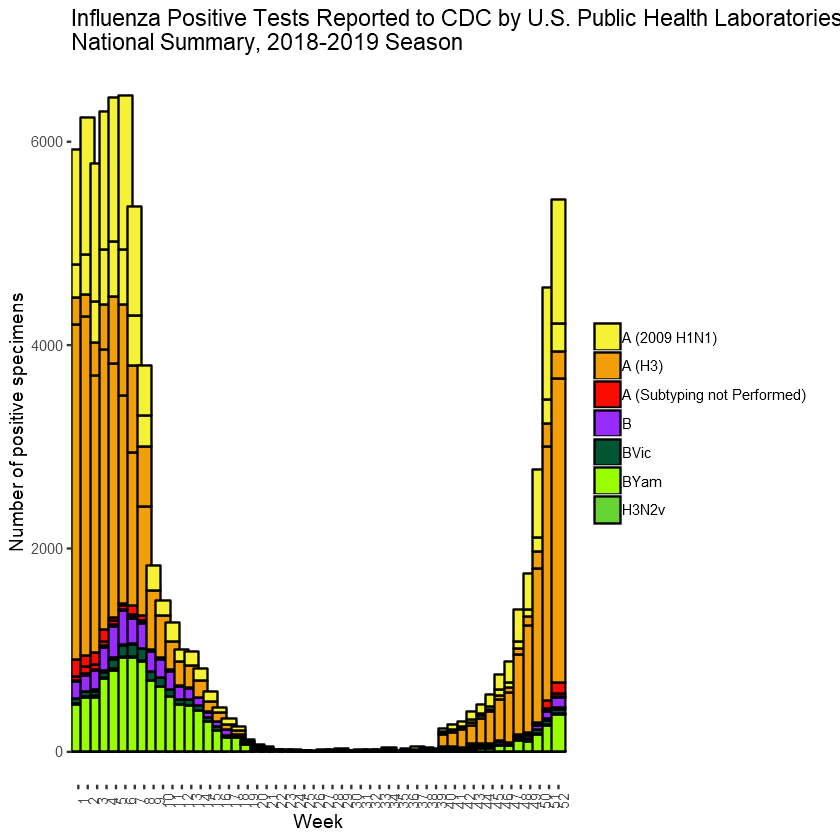

In [199]:
names(part8) <- c('REGION TYPE', 'REGION', 'YEAR', 'WEEK', 'TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v')

library(reshape2)
#part5_phl <- part5_phl[,-c(5,10)]
part8 <- part8[c('WEEK','A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam','H3N2v')]
part8 <- melt(data = part8, id = "WEEK")

library(ggplot2)
plot <- ggplot(data = part8) + 
        xlab('Week') +
        ylab('Number of positive specimens') +
        ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, \nNational Summary, 2018-2019 Season") +
        theme(axis.text.x = element_text(angle = 90),
              legend.title = element_blank(),
              panel.background = element_rect(fill = 'white')) +
  scale_fill_manual(values = c('#F5F236', '#F29E06', '#FA0C05', '#992BFF', '#005533', '#99FF00', '#66D533')) +
  geom_bar(aes(x = factor(WEEK), y = value, fill = variable),width = 1.5,color = 'black', stat = 'identity', levels = c(5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,1,2,3,4)) + 
    scale_x_discrete(breaks = part8$WEEK[c(T,F,F,F)])
plot